### Observation by using function of diachrony:

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sinr.graph_embeddings as ge
import sinr.text.evaluate as ev
import sinr.text.diachrony as dia
import numpy as np

/info/etu/m1/s2100574/miniconda3/envs/devdiachro/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load big ref model
model_big = ge.SINrVectors("./sinrvec_bnc")
model_big.load()

/info/etu/m1/s2100574/miniconda3/envs/devdiachro/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator NearestNeighbors from version 1.0.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
# load cooc matrix
sinr1 = ge.SINr.load_from_cooc_pkl("oanc_extracted_min_freq20_max_freq5900_prct_sampling1_matrix.pkl")
sinr2 = ge.SINr.load_from_cooc_pkl("oanc_extracted_min_freq50_max_freq3000_prct_sampling08_matrix.pkl")

2025-07-23 10:13:34,936 - load_from_cooc_pkl - INFO - Building Graph.
2025-07-23 10:13:34,938 - load_pkl_text - INFO - Loading cooccurrence matrix and dictionary.
2025-07-23 10:13:35,351 - load_pkl_text - INFO - Finished loading data.
2025-07-23 10:13:37,640 - load_from_cooc_pkl - INFO - Finished building graph.
2025-07-23 10:13:37,644 - load_from_cooc_pkl - INFO - Building Graph.
2025-07-23 10:13:37,645 - load_pkl_text - INFO - Loading cooccurrence matrix and dictionary.
2025-07-23 10:13:37,895 - load_pkl_text - INFO - Finished loading data.
2025-07-23 10:13:39,188 - load_from_cooc_pkl - INFO - Finished building graph.


In [4]:
modele_transfert_align_1 = model_big.transfert_sinr(sinr1)
modele_transfert_align_2 = model_big.transfert_sinr(sinr2)

2025-07-23 10:15:23,618 - extract_embeddings - INFO - Extracting embeddings.
2025-07-23 10:15:23,618 - extract_embeddings - INFO - Applying NFM.
2025-07-23 10:15:23,619 - get_nfm_embeddings - INFO - Starting NFM
2025-07-23 10:15:40,689 - extract_embeddings - INFO - NFM successfully applied.
2025-07-23 10:15:40,691 - extract_embeddings - INFO - Finished extracting embeddings.
2025-07-23 10:15:51,055 - extract_embeddings - INFO - Extracting embeddings.
2025-07-23 10:15:51,056 - extract_embeddings - INFO - Applying NFM.
2025-07-23 10:15:51,058 - get_nfm_embeddings - INFO - Starting NFM
2025-07-23 10:16:00,754 - extract_embeddings - INFO - NFM successfully applied.
2025-07-23 10:16:00,755 - extract_embeddings - INFO - Finished extracting embeddings.


In [6]:
diachro = dia.Diachronic(modele_transfert_align_1, modele_transfert_align_2)

In [10]:
# Cosine similarity (in a single model)
similarity1 = dia.Diachronic.cosine_similarity(modele_transfert_align_1, "broadcast", "radio")
similarity2 = dia.Diachronic.cosine_similarity(modele_transfert_align_2, "broadcast", "radio")
print(f"Cosine similarity between 'broadcast' and 'radio' in modele_transfert_align_1: {similarity1:.4f}")
print(f"Cosine similarity between 'broadcast' and 'radio' in modele_transfert_align_2: {similarity2:.4f}")

Cosine similarity between 'broadcast' and 'radio' in modele_transfert_align_1: 0.4027
Cosine similarity between 'broadcast' and 'radio' in modele_transfert_align_2: 0.3846


In [11]:
# Change vector (v_modele_transfert_align_1 - v_modele_transfert_align_2)
diff_vec = diachro.difference_vector("broadcast")
print("vecteur de changement :", diff_vec)
if diff_vec is not None:
    print(f"Norm of 'broadcast' change vector from modele_transfert_align_1 to modele_transfert_align_2: {np.linalg.norm(diff_vec):.4f}")
else:
    print("Word not found or dimension mismatch.")

vecteur de changement : [0. 0. 0. ... 0. 0. 0.]
Norm of 'broadcast' change vector from modele_transfert_align_1 to modele_transfert_align_2: 0.0159


In [12]:
words_to_check = ["woman", "man", "technology", "war", "freedom"]
change_norms = diachro.compute_change_norms(words_to_check)

Computing change norms: 100%|██████████| 5/5 [00:00<00:00, 906.37it/s]


In [13]:
# Display top changes
for word, norm in list(change_norms.items()):
    print(f"{word}: {norm:.4f}" if norm is not None else f"{word}: not found")

technology: 0.0220
freedom: 0.0191
war: 0.0125
woman: 0.0123
man: 0.0112


In [14]:
# Get all change vectors (for intersection vocab) or for a specific subset
change_vectors = diachro.get_change_vectors(["woman", "man", "freedom", "broadcast"])
for w, vec in change_vectors.items():
    if vec is not None:
        print(f"{w}: change vector norm = {np.linalg.norm(vec):.4f}")
    else:
        print(f"{w}: not found in both models")

woman: change vector norm = 0.0123
man: change vector norm = 0.0112
freedom: change vector norm = 0.0191
broadcast: change vector norm = 0.0159


In [15]:
vecs = diachro.get_change_vectors(words_to_check)
words, matrix = diachro.compute_similarity_matrix(vecs)

# Display similarity matrix
if len(words) > 0:
    print("Words:", words)
    print("Similarity matrix:\n", np.round(matrix, 2))
else:
    print("No valid vectors to compute similarity.")

Words: ['woman', 'man', 'technology', 'war', 'freedom']
Similarity matrix:
 [[ 1.    0.32  0.01  0.    0.11]
 [ 0.32  1.    0.    0.05  0.12]
 [ 0.01  0.    1.    0.1  -0.02]
 [ 0.    0.05  0.1   1.    0.29]
 [ 0.11  0.12 -0.02  0.29  1.  ]]


Computing change norms: 100%|██████████| 17706/17706 [00:08<00:00, 2039.55it/s]


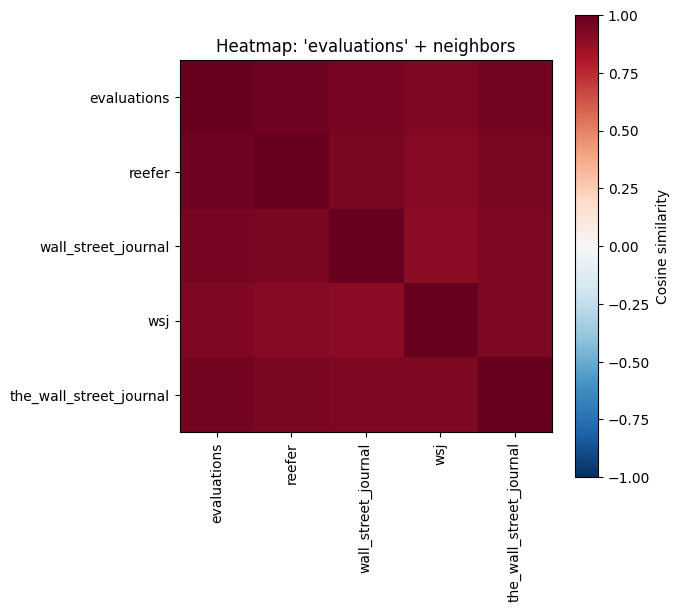

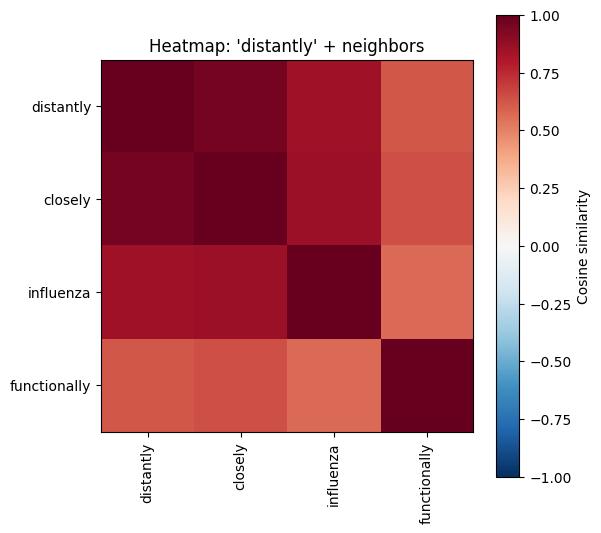

Not enough valid neighbors for 'doj_inspector', skipping heatmap.


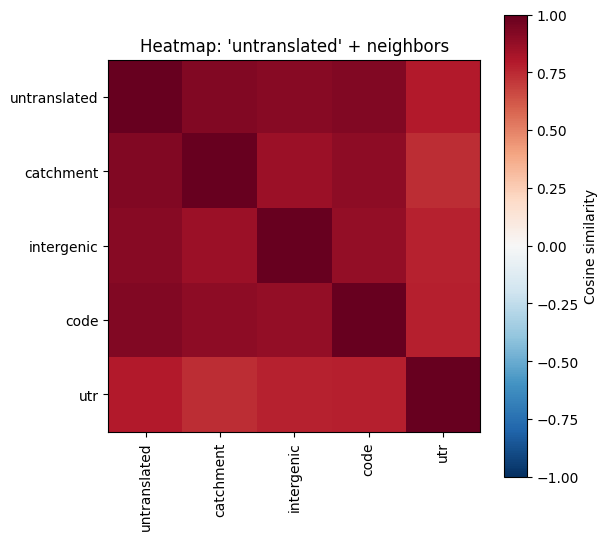

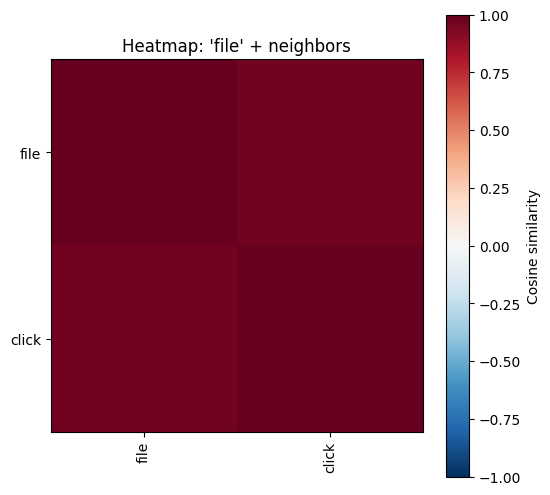

In [17]:
# Heatmaps for the top-k most changed words and their neighbors of modele_transfert_align_1
diachro.plot_topk_similarity_matrix(modele_transfert_align_1, topk=5, file_name="dia_heatmap")

Computing change norms: 100%|██████████| 9494/9494 [00:06<00:00, 1397.45it/s]


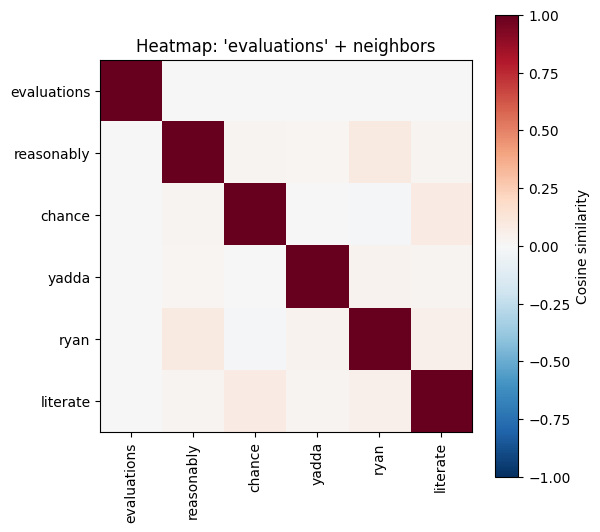

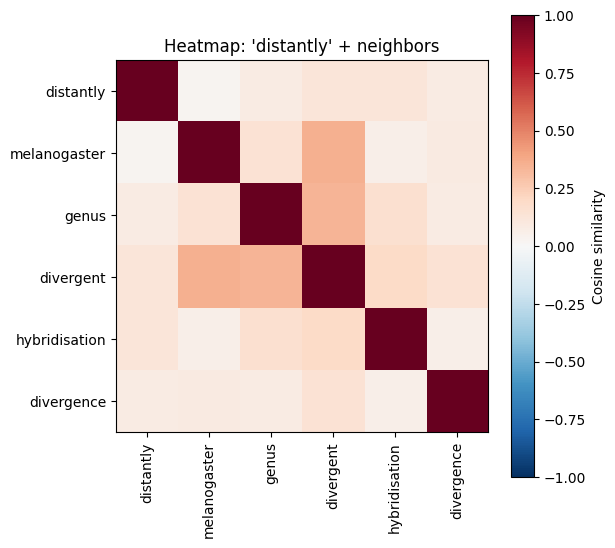

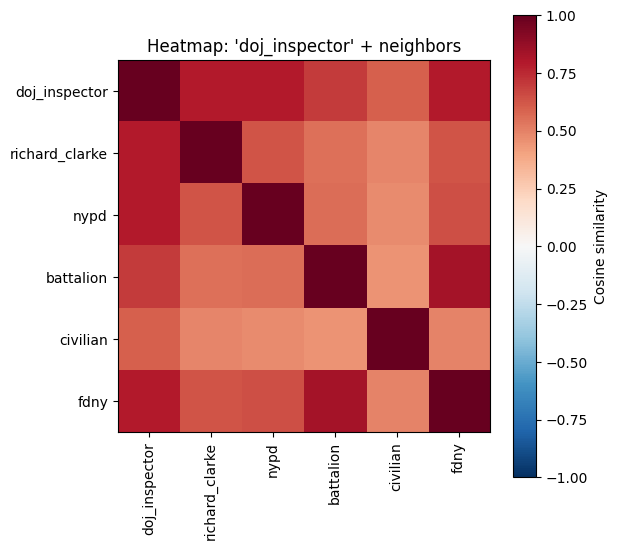

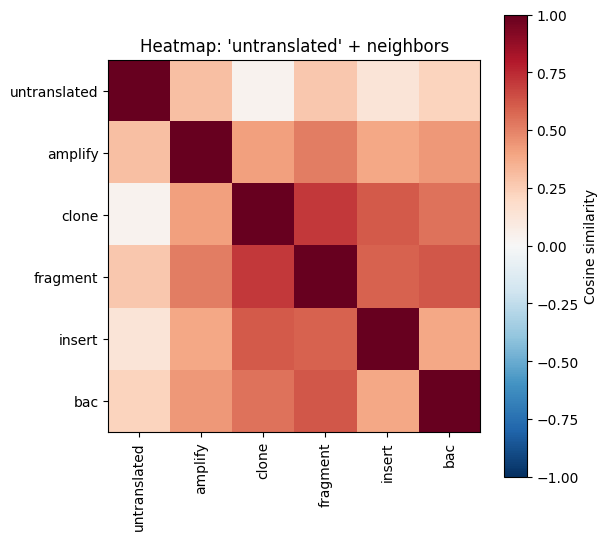

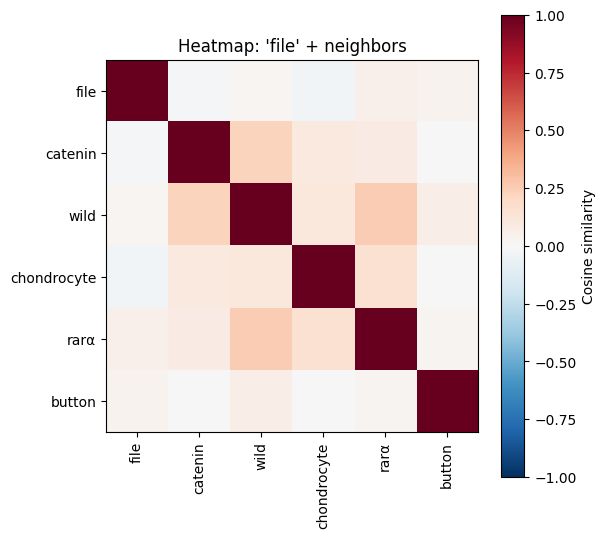

In [18]:
# Heatmaps for the top-k most changed words and their neighbors of modele_transfert_align_2
diachro.plot_topk_similarity_matrix(modele_transfert_align_2, topk=5, file_name="dia_heatmap")